import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib
cmap = matplotlib.cm.get_cmap('jet')
rgba = cmap(0.5)
print (rgba)

In [3]:
#Import data and split into two seperate dataframes
df1 = pd.read_excel("K_meansData3.xlsx", sheet_name = 'Before') 
df2 = pd.read_excel("K_meansData3.xlsx", sheet_name = 'After2')
#dfB = Before knowledge of breaches. ≥ Qu 1 - 6
dfB = pd.DataFrame(df1)
#dfA = After Knowledge of breaches ≥ Q7 - 10
dfA = pd.DataFrame(df2)

In [4]:
#Standard Scaling dfB
scaler=StandardScaler()
scaler.fit(dfB)
scaled_dfB = scaler.transform(dfB)

In [5]:
#Standard Scaling dfA
scaler=StandardScaler()
scaler.fit(dfA)
scaled_dfA = scaler.transform(dfA)

In [6]:
#PCA scaled DFB
pca=PCA(n_components = 1)
pca.fit(scaled_dfB)
dfBS = pca.transform(scaled_dfB)
#Converting back to dataframe
FBDF = pd.DataFrame(dfBS, columns = ['PCA1'])

In [7]:
#PCA scaled DFA
pca=PCA(n_components = 1)
pca.fit(scaled_dfA)
dfAS = pca.transform(scaled_dfA)
#Converting back to dataframe
FADF = pd.DataFrame(dfAS, columns = ['PCA2'])

In [8]:
#Merging PCA1 and PCA2 
GDF = pd.concat([FBDF, FADF], axis=1)

Text(0.5, 1.0, 'Scatter')

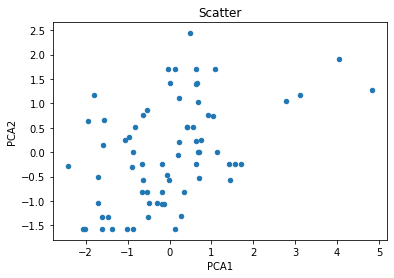

In [9]:
GDF.plot.scatter (x = 'PCA1', y= 'PCA2')
plt.title ('Scatter')

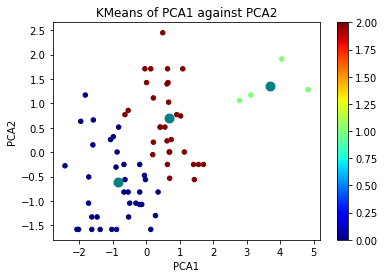

In [10]:
#KMeans performed for 3 clusters
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(GDF)
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(GDF))
fig, ax = plt.subplots(1, 1)

#KMeans Plotted 
GDF.plot.scatter(x = 'PCA1', y = 'PCA2', c= kmeans.labels_ , colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'PCA1', y = 'PCA2', ax = ax, color = 'teal',  s = 80, mark_right=False)
plt.title ('KMeans of PCA1 against PCA2')
plt.show()

GDF['KCLusters'] = (kmeans.labels_)

Text(0.5, 1.0, 'Dendrogram of PCA 1 aginst PCA 2')

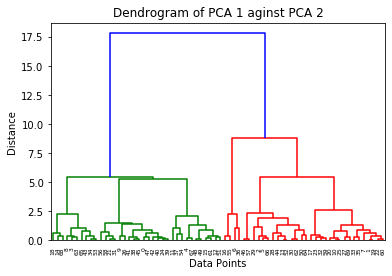

In [11]:
#Dataframe to Numpy array conversion
np_GDF = GDF.to_numpy()
# Create dendrogram
dendrogram = sch.dendrogram(sch.linkage(np_GDF, method='ward'))
# Create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
# Fit clusters to model
y_hc = hc.fit_predict(np_GDF)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title ('Dendrogram of PCA 1 aginst PCA 2')

Text(0.5, 1.0, 'Hierarchical Clustering of PCA 1 aginst PCA 2')

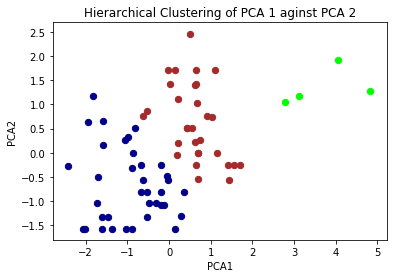

In [12]:
#Plot clustering
plt.scatter(np_GDF[y_hc ==0,0],np_GDF[y_hc == 0,1], s=40, c='darkblue')
plt.scatter(np_GDF[y_hc==1,0],np_GDF[y_hc == 1,1], s=40, c='brown')
plt.scatter(np_GDF[y_hc ==2,0], np_GDF[y_hc == 2,1], s=40, c='lime')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title ('Hierarchical Clustering of PCA 1 aginst PCA 2')


In [55]:
hc2 = pd.DataFrame(y_hc)
hc2.to_csv('Clusters.csv')